In [1]:
import pandas as pd
import numpy as np
import os

# Overwrite ****** matplotlib defaults
import seaborn as sns
import matplotlib.pyplot as plt
cm = 0.393701

plt.rcParams['svg.fonttype']='none'
plt.rcParams['pdf.fonttype']=42
plt.rcParams['font.family'] = 'Arial'

plt.rcParams['figure.dpi'] = '300'

cm = 1/2.54  # centimeters in inches
# allows specifying matplotlib sizes in cm
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['figure.figsize'] = [5*cm, 4.5*cm]

plt.rcParams["font.size"] = 6

plt.rcParams['xtick.major.width'] = 0.8
plt.rcParams['xtick.minor.width'] = 0.4
plt.rcParams['ytick.major.width'] = 0.8
plt.rcParams['ytick.minor.width'] = 0.4
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['xtick.minor.size'] = 1
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['ytick.minor.size'] = 1

The csv files were processed with easyfrap software:
https://easyfrap.vmnet.upatras.gr


In [2]:
son = pd.read_excel("data/SON_easyFRAP_Normalized_Data.xlsx", skiprows=10)
srrm2 = pd.read_excel("data/SRRM2_easyFRAP_Normalized_Data.xlsx", skiprows=10)

In [3]:
srrm2["time"] = srrm2["Time (seconds)"] - srrm2["Time (seconds)"][3]
son["time"] = son["Time (seconds)"] - son["Time (seconds)"][3]

srrm2["time_standard"] = list(range(-15,60*5,5))
son["time_standard"] = list(range(-15,60*5,5))

son["protein"] = "SON"
srrm2["protein"] = "SRRM2"

In [7]:
son_long = son.drop(columns=["Time (seconds)", "Mean Values", "Standard Deviation"]).melt(id_vars=["protein","time_standard", "time"])
srrm2_long = srrm2.drop(columns=["Time (seconds)", "Mean Values", "Standard Deviation"]).melt(id_vars=["protein","time_standard", "time"])

In [8]:
df = pd.concat([son_long, srrm2_long], ignore_index=True)
df.head()

,protein,time_standard,time,variable,value
0,SON,-15,-37.017,FRAP_004_SON_object1.csv,1.021321
1,SON,-10,-31.905,FRAP_004_SON_object1.csv,1.010352
2,SON,-5,-26.893,FRAP_004_SON_object1.csv,0.967994
3,SON,0,0.000,FRAP_004_SON_object1.csv,0.118377
4,SON,5,5.051,FRAP_004_SON_object1.csv,0.145320


<Axes: xlabel='time', ylabel='value'>

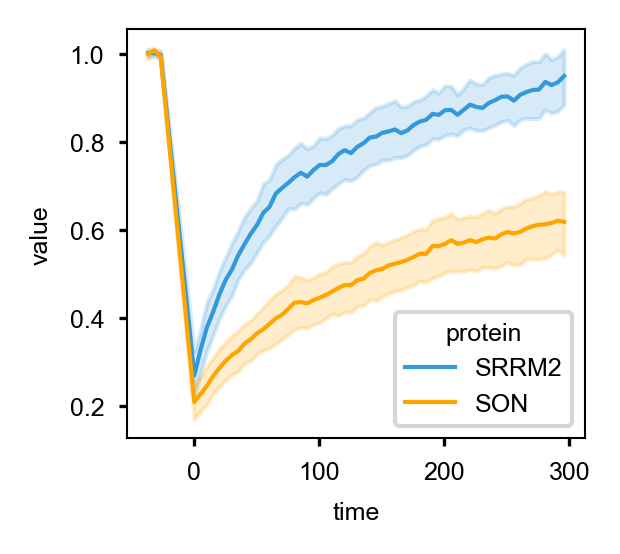

In [9]:
flatui = ["#3498db", "orange"]

sns.set_palette(flatui)
sns.lineplot(data=df, x="time", y='value', hue="protein", hue_order = ['SRRM2', 'SON'])
